In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [64]:
data = pd.read_csv('data/coupons.csv')

In [65]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [66]:
nullData = data.isnull().sum()
nullData
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

In [67]:
# Cleanse all the null values
null_columns = ['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
for i in null_columns:
    data.fillna({i:'unknown'}, inplace=True)
#Create a new column ageNumeric to hang on to ages numeric values - assign approx values to nan numeric ages
data['ageNumeric'] = pd.to_numeric(data['age'],errors='coerce')
data.loc[(data['ageNumeric'].isna()) & (data['age'] == '50plus'), 'ageNumeric'] = 100
data.loc[(data['ageNumeric'].isna()) & (data['age'] == 'below21'), 'ageNumeric'] = 0

data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
ageNumeric              0
dtype: int64

In [68]:
# Create separate columns for lower and upper salary bounds
def parse_salary_range(range_str):
    """
    Parses a salary string that can be a range, an open-ended maximum,
    or an open-ended minimum.
    Returns a tuple of (lower_bound, upper_bound).
    """
    # Remove currency symbols and commas for easier processing
    clean_str = str(range_str).replace('$', '').replace(',', '').strip()

    if 'or More' in clean_str:
        # Handles formats like '100000 or More'
        lower = int(clean_str.split(' or More')[0].strip())
        # np.nan represents the absence of an upper bound
        return lower, np.nan
    elif 'Less than' in clean_str:
        # Handles formats like 'Less than 12500'
        upper = int(clean_str.split('Less than')[1].strip())
        # We can assume the lower bound is 0 in this case
        return 0, upper
    elif ' - ' in clean_str:
        # Handles a standard range like '37500 - 49999'
        try:
            parts = clean_str.split(' - ')
            lower = int(parts[0].strip())
            upper = int(parts[1].strip())
            return lower, upper
        except (ValueError, IndexError):
            # Catches potential errors if the split doesn't work as expected
             return np.nan, np.nan
    else:
        # Fallback for any other unexpected formats
        return np.nan, np.nan
    
data[['incomeLower', 'incomeUpper']] = data['income'].apply(parse_salary_range).apply(pd.Series)


4. What proportion of the total observations chose to accept the coupon?



In [69]:
acceptanceProportion = data.query('Y==1').shape[0]/data.shape[0]
print( f'proportion of observations that accepted a coupon = {acceptanceProportion}')

proportion of observations that accepted a coupon = 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

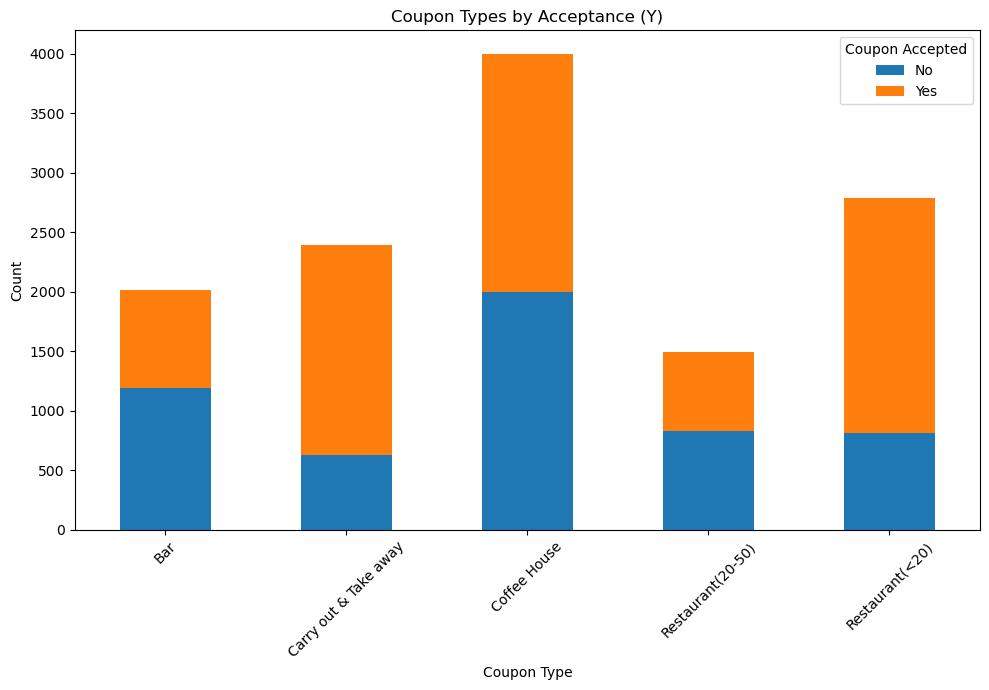

In [70]:
# Visualizing distribution of coupons  While a simple visualization works reasonably, 
# think a stacked bar plot conveys more interesting aspects of the data.  
# The bar plot shows the total counts for each coupon type, while splitting them out into accepted and declined categories
couponAcceptanceCounts = data.groupby(['coupon', 'Y']).size()
couponAcceptanceCountsPivot = couponAcceptanceCounts.unstack(fill_value=0)

couponAcceptanceCountsPivot.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Coupon Types by Acceptance (Y)')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Coupon Accepted', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

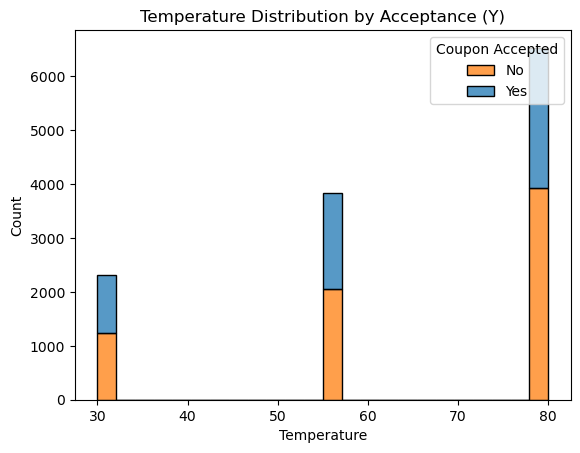

In [71]:
sns.histplot(data=data, x='temperature', hue='Y', multiple='stack')
plt.title('Temperature Distribution by Acceptance (Y)')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', loc='upper right', labels=['No', 'Yes'])
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [72]:
barData = data.query('coupon=="Bar"')
barData

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,ageNumeric,incomeLower,incomeUpper
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,21.0,37500.0,49999.0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,1,0,0,1,0,1,21.0,37500.0,49999.0
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,1,1,1,0,1,0,21.0,37500.0,49999.0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1,0,0,0,1,1,21.0,62500.0,74999.0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1,0,0,1,0,1,21.0,62500.0,74999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,1~3,1,1,0,0,1,0,26.0,75000.0,87499.0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,1~3,1,1,0,0,1,0,26.0,75000.0,87499.0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,1~3,1,1,0,0,1,0,26.0,75000.0,87499.0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,1~3,1,1,0,0,1,0,26.0,75000.0,87499.0


2. What proportion of bar coupons were accepted?


In [73]:
barAcceptanceProportion = barData.query('Y==1').shape[0]/barData.shape[0]
print( f'proportion of bar observations that accepted a coupon = {barAcceptanceProportion}')

proportion of bar observations that accepted a coupon = 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


proportion of bar observations that accepted a coupon with greater than 3 visits = 0.7688442211055276
proportion of bar observations that accepted a coupon with less than 3 visits = 0.37061769616026713


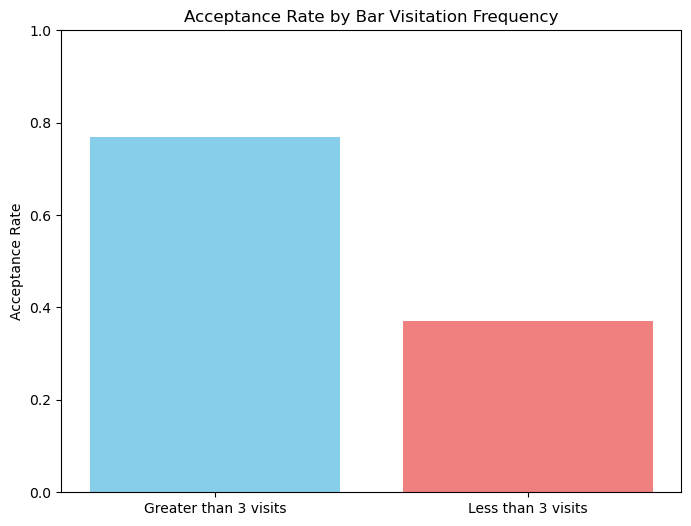

In [74]:
# Create two dataframes where one contains everything that is less than 3 visits and another that contains everything that is greater
# Keep in mind we have unknowns in it
greaterThanThreeVisits = barData.query( 'Bar in (["4~8","gt8"])')
greaterThanThreeProportion = greaterThanThreeVisits.query('Y==1').shape[0]/greaterThanThreeVisits.shape[0]

lessThanThreeVisits = barData.query( 'Bar in (["never","less1","1~3"])')
lessThanThreeProportion = lessThanThreeVisits.query('Y==1').shape[0]/lessThanThreeVisits.shape[0]


print( f'proportion of bar observations that accepted a coupon with greater than 3 visits = {greaterThanThreeProportion}')
print( f'proportion of bar observations that accepted a coupon with less than 3 visits = {lessThanThreeProportion}')

labels = ['Greater than 3 visits', 'Less than 3 visits']
proportions = [greaterThanThreeProportion, lessThanThreeProportion]

plt.figure(figsize=(8, 6))
plt.bar(labels, proportions, color=['skyblue', 'lightcoral'])
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Bar Visitation Frequency')
plt.ylim(0, 1) # Proportions are between 0 and 1
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


acceptance proportion of drivers over 25 with atleast one visit to the bar = 0.6952
acceptance proportion of drivers that are not over 25 with none or unknown number of visits to the bar = 0.3350


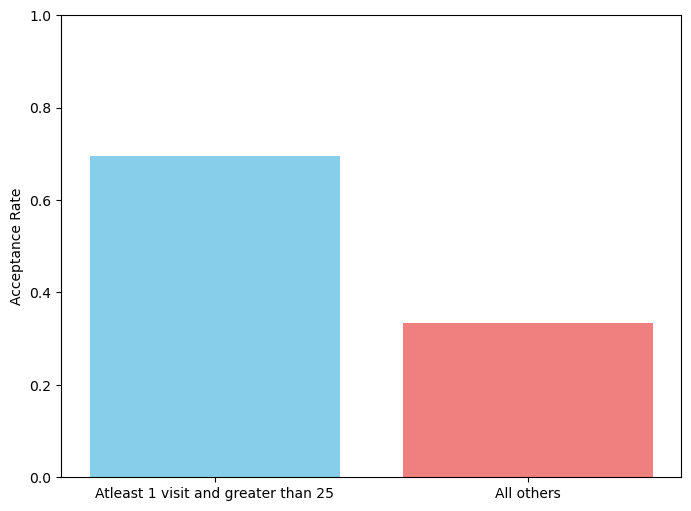

In [75]:
# Create two dataframes where one contains everything that has atleast one bar visit and over the age of 25, and all others.
# Create two dataframes where one contains everything that has atleast one bar visit and over the age of 25, and all others.
filteredGroup = barData.query('Bar not in ["unknown","never","less1"] and ageNumeric > 25')
othersGroup = barData.query('not (Bar not in ["unknown","never","less1"] and ageNumeric > 25)')

filteredGroupProportion = filteredGroup.query('Y==1').shape[0]/filteredGroup.shape[0]
otherGroupProportion = othersGroup.query('Y==1').shape[0]/othersGroup.shape[0]

print( f'acceptance proportion of drivers over 25 with atleast one visit to the bar = {filteredGroupProportion:.4f}')
print( f'acceptance proportion of drivers that are not over 25 with none or unknown number of visits to the bar = {otherGroupProportion:.4f}')


labels = ['Atleast 1 visit and greater than 25', 'All others']
proportions = [filteredGroupProportion, otherGroupProportion]

plt.figure(figsize=(8, 6))
plt.bar(labels, proportions, color=['skyblue', 'lightcoral'])
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Proportions are between 0 and 1
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [87]:
adultPassengerAndfilteredOccupationDF = barData.query('Bar not in ["unknown","never","less1"] and passanger not in ["Kid(s)", "Alone"] and occupation != "Farming Fishing & Forestry"').copy()
otherDF = barData.query('not (Bar not in ["unknown","never","less1"] and passanger not in ["Kid(s)", "Alone"] and occupation != "Farming Fishing & Forestry")').copy()

adultPassengerAndfilteredOccupationDF['description'] = 'selected group'
otherDF['description'] = 'all others'
targetDF5 = pd.concat( [adultPassengerAndfilteredOccupationDF, otherDF] )
groupedDF5 =  targetDF5.groupby(['description', 'Y']).size().unstack(fill_value=0).reindex()
groupedDF5['total'] = groupedDF5[0] + groupedDF5[1]
groupedDF5['acceptanceRate'] = groupedDF5[1]/(groupedDF5[0] + groupedDF5[1])

groupedDF5

Y,0,1,total,acceptanceRate
description,,,,
all others,1135,687,1822,0.377058
selected group,55,140,195,0.717949


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [92]:
filter1 = (~barData['Bar'].isin(['unknown', 'never', 'less1'])) & \
          (~barData['passanger'].isin(['Kid(s)', 'Alone'])) & \
          (barData['maritalStatus'] != 'Widowed')

# Create the second boolean mask
filter2 = (~barData['Bar'].isin(['unknown', 'never', 'less1'])) & \
          (barData['ageNumeric'] < 30)

# Create the third boolean mask
filter3 = (barData['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & \
          (~barData['income'].isin(['50~74k', '75~99k', '100k or more']))

# Combine the three boolean masks
complex_filter = filter1 | filter2 | filter3
complexFilterDF = barData[complex_filter].copy()

negated_filter = ~complex_filter
otherDF = barData[negated_filter].copy()

complexFilterDF['description'] = 'selected group'
otherDF['description'] = 'all others'
targetDF5 = pd.concat( [complexFilterDF, otherDF] )
groupedDF5 =  targetDF5.groupby(['description', 'Y']).size().unstack(fill_value=0).reindex()
groupedDF5['total'] = groupedDF5[0] + groupedDF5[1]
groupedDF5['acceptanceRate'] = groupedDF5[1]/(groupedDF5[0] + groupedDF5[1])

groupedDF5

Y,0,1,total,acceptanceRate
description,,,,
all others,699,340,1039,0.327238
selected group,491,487,978,0.497955


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?


Based on the analysis performed:

**Bar Coupons:**

*   Overall acceptance rate for bar coupons is lower than the general coupon acceptance rate.
*   Drivers who visit bars more frequently (4+ times a month) have a significantly higher acceptance rate for bar coupons compared to those who visit less often.
*   Drivers over 25 who visit bars at least once a month show a higher acceptance rate than others.
*   Drivers who go to bars more than once a month, have passengers other than kids, and are not in farming, fishing, or forestry occupations also have a higher acceptance rate.
*   A complex combination of factors, including bar visitation frequency, passenger type, marital status, age, and restaurant preferences, also shows a higher acceptance rate for bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Focusing on Carry out and Take away

In [104]:
takeawayGroup = data.query( 'coupon == "Carry out & Take away"')
takeawyGroupProportion = takeawayGroup.query('Y==1').shape[0]/takeawayGroup.shape[0]
takeawyGroupProportion

0.7354784788967823

ANALYSIS BY GENDER

In [51]:

grouped =  takeawayGroup.groupby(['gender','Y']).size().unstack(fill_value=0).reindex()
grouped['total'] = grouped[0] + grouped[1]
grouped['acceptanceRate'] = grouped[1]/(grouped[0] + grouped[1])
display(grouped)

Y,0,1,total,acceptanceRate
gender,,,,
Female,355,885,1240,0.71371
Male,278,875,1153,0.75889


ANALYSIS BY AGE AND GENDER

In [52]:
groupedByAgeAndGender = takeawayGroup.groupby(['gender','age','Y']).size().unstack(fill_value=0)
groupedByAgeAndGender['total'] = groupedByAgeAndGender[0] + groupedByAgeAndGender[1]
groupedByAgeAndGender['acceptanceRate'] = groupedByAgeAndGender[1]/(groupedByAgeAndGender[0] + groupedByAgeAndGender[1])
groupedByAgeAndGender = groupedByAgeAndGender.reset_index()

groupedByAgeAndGender.head(20)

Y,gender,age,0,1,total,acceptanceRate
0,Female,21,61,167,228,0.732456
1,Female,26,59,151,210,0.719048
2,Female,31,75,147,222,0.662162
3,Female,36,40,84,124,0.677419
4,Female,41,42,83,125,0.664000
5,Female,46,10,48,58,0.827586
6,Female,50plus,55,172,227,0.757709
7,Female,below21,13,33,46,0.717391
8,Male,21,65,193,258,0.748062
9,Male,26,67,193,260,0.742308


GRAPH BY AGE AND GENDER

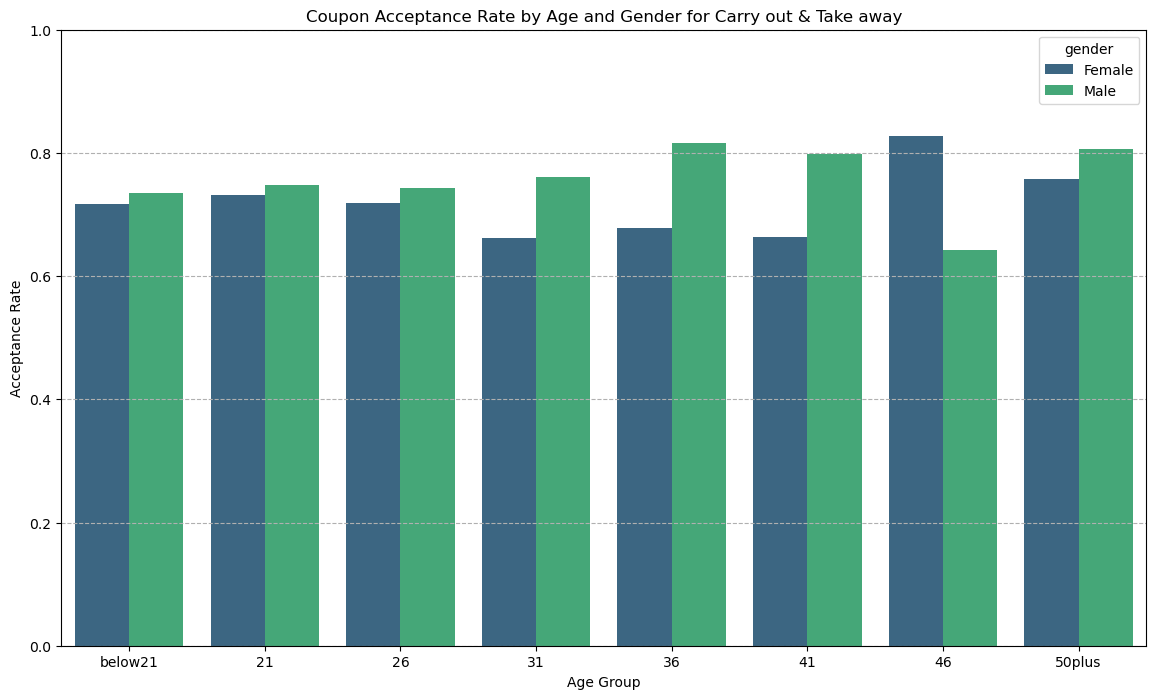

In [53]:
# Define the custom order for age groups
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

plt.figure(figsize=(14, 8))
sns.barplot(data=groupedByAgeAndGender, x='age', y='acceptanceRate', hue='gender', palette='viridis', order=age_order)
plt.title('Coupon Acceptance Rate by Age and Gender for Carry out & Take away')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.show()

ANALYSIS BY GENDER AND MARITAL STATUS

In [54]:
groupedByMaritalStatusAndGender = takeawayGroup.groupby(['gender','maritalStatus','Y']).size().unstack(fill_value=0)
groupedByMaritalStatusAndGender['total'] = groupedByMaritalStatusAndGender[0] + groupedByMaritalStatusAndGender[1]
groupedByMaritalStatusAndGender['acceptanceRate'] = groupedByMaritalStatusAndGender[1]/(groupedByMaritalStatusAndGender[0] + groupedByMaritalStatusAndGender[1])
groupedByMaritalStatusAndGender = groupedByMaritalStatusAndGender.reset_index()

groupedByMaritalStatusAndGender.head(20)


Y,gender,maritalStatus,0,1,total,acceptanceRate
0,Female,Divorced,29,54,83,0.650602
1,Female,Married partner,150,380,530,0.716981
2,Female,Single,107,277,384,0.721354
3,Female,Unmarried partner,67,157,224,0.700893
4,Female,Widowed,2,17,19,0.894737
5,Male,Divorced,1,24,25,0.960000
6,Male,Married partner,103,310,413,0.750605
7,Male,Single,128,416,544,0.764706
8,Male,Unmarried partner,44,120,164,0.731707
9,Male,Widowed,2,5,7,0.714286


GRAPH BY GENDER AND MARITAL STATUS

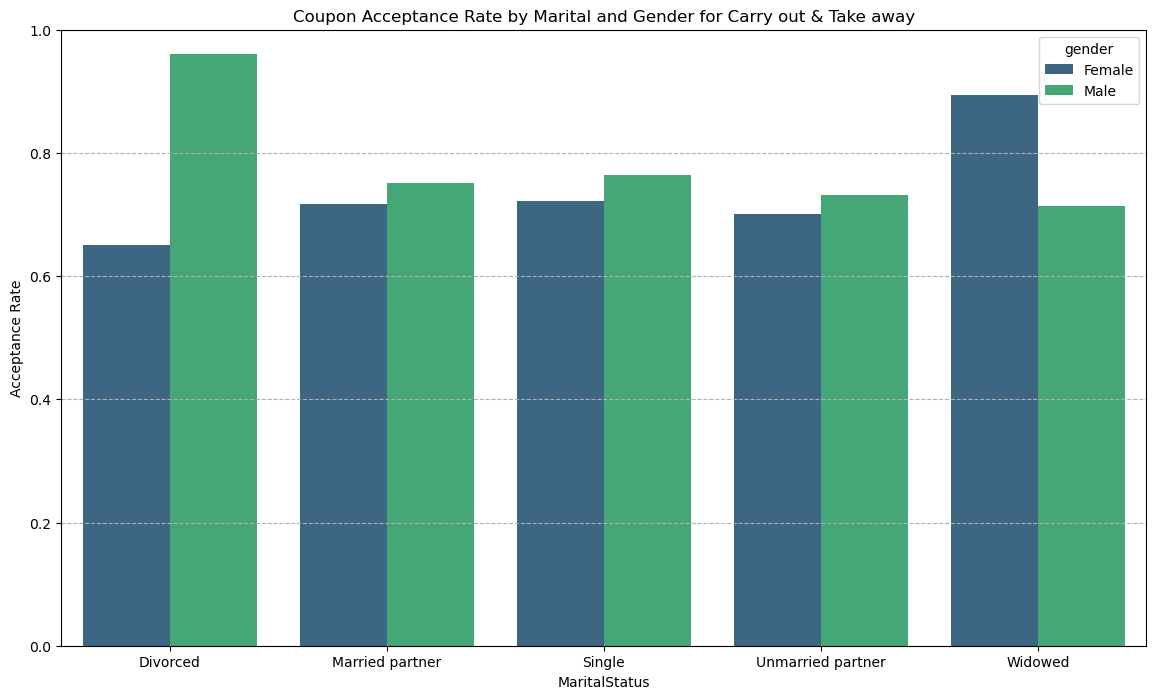

In [55]:

plt.figure(figsize=(14, 8))
sns.barplot(data=groupedByMaritalStatusAndGender, x='maritalStatus', y='acceptanceRate', hue='gender', palette='viridis')
plt.title('Coupon Acceptance Rate by Marital and Gender for Carry out & Take away')
plt.xlabel('MaritalStatus')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.show()

ANALYSIS BY CHILDREN

In [56]:
groupByHasChildren = takeawayGroup.groupby(['has_children','Y']).size().unstack(fill_value=0)
groupByHasChildren['total'] = groupByHasChildren[0] + groupByHasChildren[1]
groupByHasChildren['acceptanceRate'] = groupByHasChildren[1]/(groupByHasChildren[0] + groupByHasChildren[1])

groupByHasChildren

Y,0,1,total,acceptanceRate
has_children,,,,
0,366,1001,1367,0.732260
1,267,759,1026,0.739766


ANALYSIS BY CARRY AWAY FREQUENCY

In [57]:
filteredGroup1 = takeawayGroup.query( 'CarryAway in( ["never", "less1"])').copy()
filteredGroup1['carryAwayFreq'] = 'neverLess1'
filteredGroup2 = takeawayGroup.query( 'CarryAway in( ["1~3","4~8","gt8"])').copy()
filteredGroup2['carryAwayFreq'] = 'AtleastOnce'

combinedDF = pd.concat( [filteredGroup1, filteredGroup2])
combinedGroup = combinedDF.groupby(['carryAwayFreq','Y']).size().unstack(fill_value=0)
combinedGroup['total'] = combinedGroup[0] + combinedGroup[1]
combinedGroup['acceptanceRate'] = combinedGroup[1]/(combinedGroup[0] + combinedGroup[1])

combinedGroup.head(20)

Y,0,1,total,acceptanceRate
carryAwayFreq,,,,
AtleastOnce,509,1477,1986,0.743706
neverLess1,121,264,385,0.685714


ANALYSIS BY COUPON EXPIRATION

In [58]:
filteredGroup1 = takeawayGroup.query( 'toCoupon_GEQ25min == 1').copy()
filteredGroup1['expiration'] = 'over 25 minutes'
filteredGroup2 = takeawayGroup.query( 'toCoupon_GEQ25min == 0').copy()
filteredGroup2['expiration'] = 'under 25 minutes'

combinedDF = pd.concat( [filteredGroup1, filteredGroup2])
combinedGroup = combinedDF.groupby(['expiration','Y']).size().unstack(fill_value=0)
combinedGroup['total'] = combinedGroup[0] + combinedGroup[1]
combinedGroup['acceptanceRate'] = combinedGroup[1]/(combinedGroup[0] + combinedGroup[1])

combinedGroup.head(20)

Y,0,1,total,acceptanceRate
expiration,,,,
over 25 minutes,71,194,265,0.732075
under 25 minutes,562,1566,2128,0.735902


FURTHER DRILL DOWN - COUPON EXPIRATION

In [59]:
filteredGroup1 = takeawayGroup.query( 'toCoupon_GEQ25min == 1').copy()
filteredGroup1['expiration'] = 'over 25 minutes'
filteredGroup2 = takeawayGroup.query( 'toCoupon_GEQ15min == 1  and toCoupon_GEQ25min == 0').copy()
filteredGroup2['expiration'] = 'under 15 minutes'
filteredGroup3 = takeawayGroup.query( 'toCoupon_GEQ15min == 0  and toCoupon_GEQ25min == 0 and toCoupon_GEQ5min == 1').copy()
filteredGroup3['expiration'] = 'under 5 minutes'

combinedDF = pd.concat( [filteredGroup1, filteredGroup2, filteredGroup3])
combinedGroup = combinedDF.groupby(['expiration','Y']).size().unstack(fill_value=0)
combinedGroup['total'] = combinedGroup[0] + combinedGroup[1]
combinedGroup['acceptanceRate'] = combinedGroup[1]/(combinedGroup[0] + combinedGroup[1])

combinedGroup.head(20)

Y,0,1,total,acceptanceRate
expiration,,,,
over 25 minutes,71,194,265,0.732075
under 15 minutes,346,909,1255,0.724303
under 5 minutes,216,657,873,0.752577


TYING GENDER, AGE AND CARRYAWAY FINDINGS TOGETHER

In [60]:
filteredGroup1 = takeawayGroup.query('CarryAway in( ["never", "less1"])').copy()
filteredGroup1['carryAwayFreq'] = 'neverLess1'
filteredGroup2 = takeawayGroup.query('CarryAway in( ["1~3","4~8","gt8"])').copy()
filteredGroup2['carryAwayFreq'] = 'AtleastOnce'

combinedDF = pd.concat( [filteredGroup1, filteredGroup2])

groupedByFreqAgeAndGender = combinedDF.groupby(['carryAwayFreq', 'gender','age','Y']).size().unstack(fill_value=0)
groupedByFreqAgeAndGender['total'] = groupedByFreqAgeAndGender[0] + groupedByFreqAgeAndGender[1]
groupedByFreqAgeAndGender['acceptanceRate'] = groupedByFreqAgeAndGender[1]/(groupedByFreqAgeAndGender[0] + groupedByFreqAgeAndGender[1])
groupedByFreqAgeAndGender = groupedByFreqAgeAndGender.reset_index()

groupedByFreqAgeAndGender

Y,carryAwayFreq,gender,age,0,1,total,acceptanceRate
0,AtleastOnce,Female,21,54,138,192,0.718750
1,AtleastOnce,Female,26,45,136,181,0.751381
2,AtleastOnce,Female,31,62,135,197,0.685279
3,AtleastOnce,Female,36,37,78,115,0.678261
4,AtleastOnce,Female,41,29,66,95,0.694737
5,AtleastOnce,Female,46,9,36,45,0.800000
6,AtleastOnce,Female,50plus,33,129,162,0.796296
7,AtleastOnce,Female,below21,9,22,31,0.709677
8,AtleastOnce,Male,21,54,163,217,0.751152
9,AtleastOnce,Male,26,64,175,239,0.732218


GRAPH - TYING FINDINGS TOGETHER

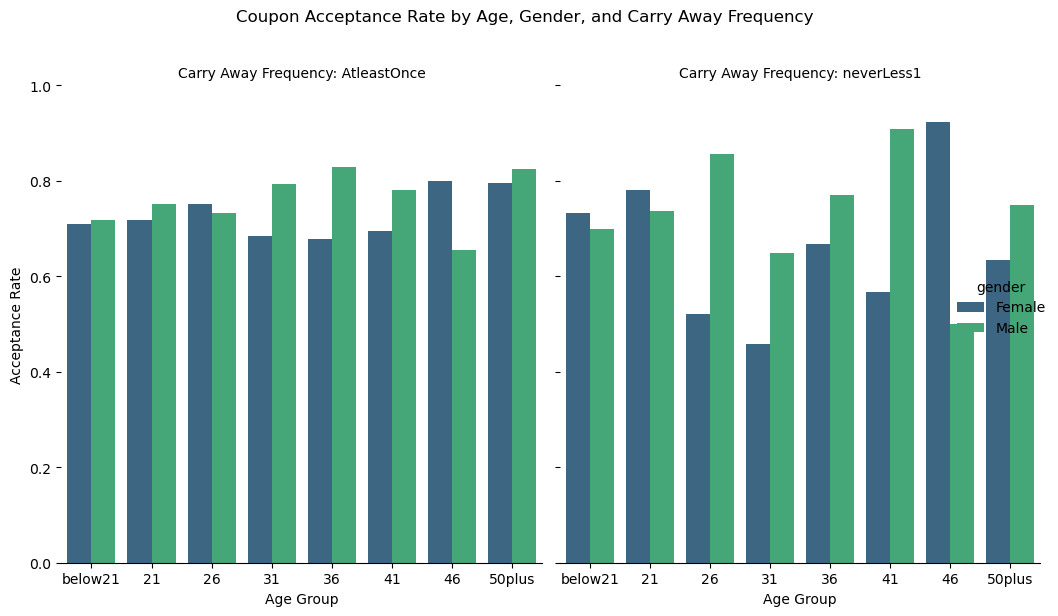

In [61]:
# Define the custom order for age groups
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# Use catplot to create separate plots for each carryAwayFreq
g = sns.catplot(data=groupedByFreqAgeAndGender, x='age', y='acceptanceRate',
                hue='gender', col='carryAwayFreq', kind='bar',
                palette='viridis', order=age_order, height=6, aspect=0.8)

g.fig.suptitle('Coupon Acceptance Rate by Age, Gender, and Carry Away Frequency', y=1.02) # Add a title
g.set_axis_labels("Age Group", "Acceptance Rate")
g.set_titles("Carry Away Frequency: {col_name}")
g.despine(left=True)
plt.ylim(0, 1) # Ensure y-axis is between 0 and 1
plt.tight_layout()
plt.show()

ANALYZE RELATIONSHIP WITH INCOMES

In [102]:
incomeGroupDF = takeawayGroup.groupby(['income', 'gender', 'Y']).size().unstack(fill_value=0)
incomeGroupDF['total'] = incomeGroupDF[0] + incomeGroupDF[1]
incomeGroupDF['acceptanceRate'] = incomeGroupDF[1]/(incomeGroupDF[0] + incomeGroupDF[1])
incomeGroupDF = incomeGroupDF.reset_index()
incomeGroupDF

Y,income,gender,0,1,total,acceptanceRate
0,$100000 or More,Female,45,96,141,0.680851
1,$100000 or More,Male,50,132,182,0.725275
2,$12500 - $24999,Female,50,143,193,0.740933
3,$12500 - $24999,Male,35,116,151,0.768212
4,$25000 - $37499,Female,55,181,236,0.766949
5,$25000 - $37499,Male,31,115,146,0.787671
6,$37500 - $49999,Female,58,134,192,0.697917
7,$37500 - $49999,Male,40,109,149,0.731544
8,$50000 - $62499,Female,29,105,134,0.783582
9,$50000 - $62499,Male,38,122,160,0.762500


VISUALIZE THE DATA

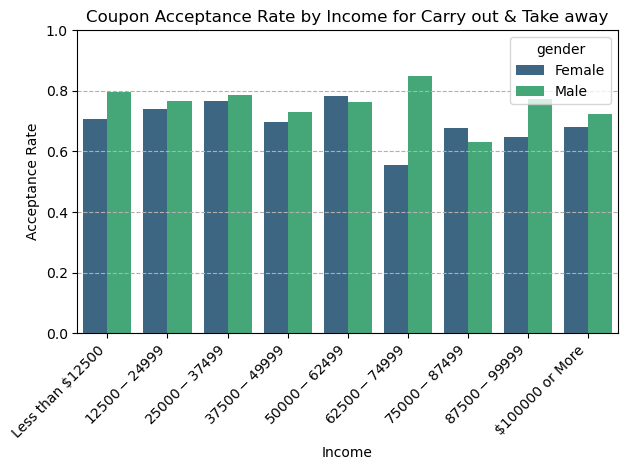

In [103]:
income_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']


sns.barplot(data=incomeGroupDF, x='income', y='acceptanceRate', hue="gender", palette='viridis', order=income_order)
plt.title('Coupon Acceptance Rate by Income for Carry out & Take away')
plt.xlabel('Income')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right') # Rotate labels by 45 degrees and align them to the right
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Impressions on Coupon Acceptance Patterns

**Carry out & Take away Coupons:**

*   The overall acceptance rate for Carry out & Take away coupons is relatively high.
*   There isn't a significant difference in acceptance rates between genders for these coupons.
*   Acceptance rates by age and gender show some variation, with certain age groups and genders having slightly higher or lower rates, but generally, the acceptance is consistently high across most groups.
*   Marital status and gender also show some variations in acceptance rates, but the differences are not as pronounced as in the bar coupon analysis. Widowed individuals show a slightly higher acceptance rate.
*   Having children or not does not seem to have a significant impact on the acceptance rate for Carry out & Take away coupons.
*   Carry Away frequency (how often someone gets carry out) appears to influence acceptance, with those who get carry out at least once a month having a slightly higher acceptance rate.
*   Distance to the coupon location (expiration related to time) does not seem to have a significant impact on acceptance rates.
*   When considering the combined factors of Carry Away frequency, gender, and age, those who get carry away less often show more variability in acceptance rates across age and gender groups compared to those who get carry away at least once a month.
*   Income levels show some fluctuations in acceptance rates across different income brackets and genders for Carry out & Take away coupons.